In [19]:
from numpy import genfromtxt
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
from itertools import cycle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler

[0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1.
 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1.
 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1.
 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1.
 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0.
 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 1. 1. 1. 1. 0.]


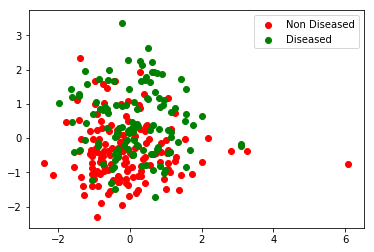

In [20]:
dataset = genfromtxt('Actual Data With Empty Values.csv',delimiter=',')

X = dataset[:,0:12]
Y = dataset[:,13]
for index, item in enumerate(Y):     
	if not (item == 0.0):       
		Y[index] = 1
print(Y)
target_names = ['Non Diseased','Diseased']
def plot_2D(data,target,target_names):
	colors = cycle('rgbcmykw')
	target_ids = range(len(target_names))
	plt.figure()
	for i,c, label in zip(target_ids, colors, target_names):
		plt.scatter(data[target == i, 0], data[target == i, 1], c=c, label=label)
	plt.legend()
	plt.savefig('Problem 2 Graph')

pca = PCA(n_components=2, whiten=True).fit(X)
X_new = pca.transform(X)

plot_2D(X_new, Y, target_names)
plt.show()

In [21]:
modelSVM2 = SVC(C = 1.0,kernel='poly')
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(X_new, Y, test_size = 0.2, train_size=0.8, random_state=0)
modelSVM2 = modelSVM2.fit(X_train2,Y_train2)
accuracy2 = modelSVM2.score(X_test2,Y_test2)
print('Polynomial score with split = {0:.1f}%'.format(accuracy2*100))

Polynomial score with split = 68.5%


In [22]:
modelSVM2 = SVC(C = 1.0,kernel='rbf')
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(X_new, Y, test_size = 0.2, train_size=0.8, random_state=0)
modelSVM2 = modelSVM2.fit(X_train2,Y_train2)
accuracy2 = modelSVM2.score(X_test2,Y_test2)
print('RBF score with split = {0:.1f}%'.format(accuracy2*100))

RBF score with split = 72.2%


In [23]:
svc = SVC(C=1.0,kernel='rbf')
parameters = {'C': (100, 1e3, 1e4, 1e5),'gamma': (1e-08, 1e-7, 1e-6, 1e-5)}
grid_search = GridSearchCV(svc, parameters, n_jobs=-1, cv=5)
X_train6,X_test6,Y_train6,Y_test6 = train_test_split(X_new, Y, test_size = 0.2, train_size=0.8, random_state=0)
grid_search.fit(X_train6, Y_train6)
svc_best = grid_search.best_estimator_
accuracy = svc_best.score(X_test6, Y_test6)
print('Grid search:{0:.1f}%'.format(accuracy*100))

Grid search:72.2%


In [24]:
skf=StratifiedKFold(n_splits=6)
for train_index, test_index in skf.split(X_new, Y):
        X_train5,X_test5=X_new[train_index],X_new[test_index]
        Y_train5,Y_test5=Y[train_index],Y[test_index]

modelSVM5 = SVC(C=1.0, kernel='rbf')
modelSVM5 = modelSVM5.fit(X_train5,Y_train5)
accuracy5 = modelSVM5.score(X_test5,Y_test5)
print('Stratified K Fold Score = {0:.1f}%'.format(accuracy5*100))

Stratified K Fold Score = 73.3%


In [25]:
prediction = modelSVM5.predict(X_test5)
report = classification_report(Y_test5, prediction)
print(report)

             precision    recall  f1-score   support

        0.0       0.81      0.68      0.74        25
        1.0       0.67      0.80      0.73        20

avg / total       0.75      0.73      0.73        45



In [26]:
modelSVMRaw5 = SVC(C=1.0, kernel='rbf')
modelSVMRaw5 = modelSVMRaw5.fit(X_new,Y)
cnt2 = 0
for i in modelSVMRaw5.predict(X_new):
	if i == Y[1]:
		cnt2 = cnt2 + 1
accuracy_5 = float(cnt2)/270
print('On PCA valued X_new = {0:.1f}%'.format(accuracy_5*100))

On PCA valued X_new = 38.9%


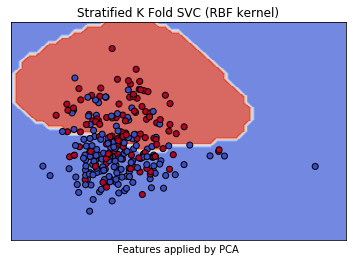

In [27]:
X_min, X_max = X_new[:,0].min() - 1, X_new[:,0].max() + 1
Y_min, Y_max = X_new[:,1].min() - 1, X_new[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(X_min, X_max,0.2),np.arange(Y_min, Y_max,0.2))


plt .subplot(1,1, i + 1)
Z = modelSVM5.predict(np.c_[xx.ravel(), yy.ravel()])


Z = Z.reshape(xx.shape)
plt.contourf(xx,yy,Z,cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_new[:,0], X_new[:,1], c=Y,cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel("Features applied by PCA")
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.xticks(())
plt.yticks(())
plt.legend()
titles = "Stratified K Fold SVC (RBF kernel)"
plt.title(titles)
plt.savefig('Graph')
plt.show()

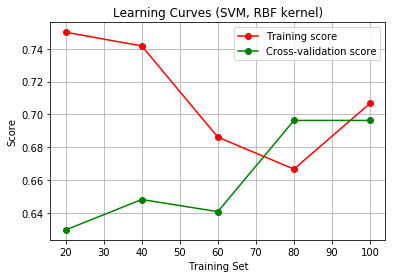

In [28]:
train_sizes, train_scores, valid_scores = learning_curve(SVC(C=1.0, kernel='rbf'), X_new, Y, train_sizes=[20,40,60,80,100], cv=6)
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
plt.xlabel("Training Set")
plt.ylabel("Score")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
plt.plot(train_sizes, valid_scores_mean, 'o-', color="g",label="Cross-validation score")
plt.legend()
plt.grid()
plt.title("Learning Curves (SVM, RBF kernel)")
plt.savefig('train')
plt.show()

In [29]:
StdSc= StandardScaler()
StdSc= StdSc.fit(X)
X_new= StdSc.transform(X)

In [30]:
modelSVM2 = SVC(C = 1.0,kernel='rbf')
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(X_new, Y, test_size = 0.2, train_size=0.8, random_state=0)
modelSVM2 = modelSVM2.fit(X_train2,Y_train2)
accuracy2 = modelSVM2.score(X_test2,Y_test2)
print('RBF score with split = {0:.1f}%'.format(accuracy2*100))

RBF score with split = 79.6%


In [31]:
skf=StratifiedKFold(n_splits=6)
for train_index, test_index in skf.split(X_new, Y):
        X_train5,X_test5=X_new[train_index],X_new[test_index]
        Y_train5,Y_test5=Y[train_index],Y[test_index]

modelSVM5 = SVC(C=1.0, kernel='rbf')
modelSVM5 = modelSVM5.fit(X_train5,Y_train5)
accuracy5 = modelSVM5.score(X_test5,Y_test5)
print('Stratified K Fold Score = {0:.1f}%'.format(accuracy5*100))

Stratified K Fold Score = 84.4%


In [32]:
prediction = modelSVM5.predict(X_test5)
report = classification_report(Y_test5, prediction)
print(report)

             precision    recall  f1-score   support

        0.0       0.82      0.92      0.87        25
        1.0       0.88      0.75      0.81        20

avg / total       0.85      0.84      0.84        45



In [33]:
pca = PCA(n_components=2, whiten=True).fit(X_new)
X_new = pca.transform(X_new)
skf=StratifiedKFold(n_splits=6)
for train_index, test_index in skf.split(X_new, Y):
        X_train5,X_test5=X_new[train_index],X_new[test_index]
        Y_train5,Y_test5=Y[train_index],Y[test_index]

modelSVM5 = SVC(C=1.0, kernel='rbf')
modelSVM5 = modelSVM5.fit(X_train5,Y_train5)

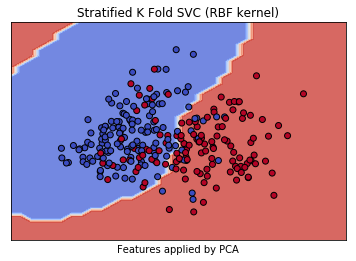

In [34]:
X_min, X_max = X_new[:,0].min() - 1, X_new[:,0].max() + 1
Y_min, Y_max = X_new[:,1].min() - 1, X_new[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(X_min, X_max,0.2),np.arange(Y_min, Y_max,0.2))


plt .subplot(1,1, i + 1)
Z = modelSVM5.predict(np.c_[xx.ravel(), yy.ravel()])


Z = Z.reshape(xx.shape)
plt.contourf(xx,yy,Z,cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_new[:,0], X_new[:,1], c=Y,cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel("Features applied by PCA")
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.xticks(())
plt.yticks(())
plt.legend()
titles = "Stratified K Fold SVC (RBF kernel)"
plt.title(titles)
plt.savefig('Graph1')
plt.show()